In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# โหลดข้อมูลเลขลายมือ

In [2]:
digits = datasets.load_digits()
digits.keys() # ดูคีย์ข้อมูล

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [7]:
digits.target[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [8]:
img = digits.images[0]
img.shape # 8 row * 8 column

(8, 8)

In [9]:
print(img)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [10]:
print(np.isnan(digits.images).sum())

0


# Show number

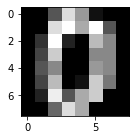

In [11]:
img = digits.images[0]
plt.figure(figsize=(2,2))
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

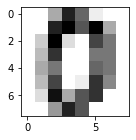

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(img,cmap=plt.cm.gray_r)
plt.show()

In [13]:
def visual_multi(i):
    '"Plors 15 digits start at i i"'
    nplots = 40                         # จำนวน feature ที่แสดง (จำนวนภาพ)
    fig = plt.figure(figsize=(8,4))     # size
    for j in range(nplots):
        plt.subplot(4,10,j+1)           # 4 row * 10 column
        plt.imshow(digits.images[i+j],cmap='binary')   # label picture 0,1,2,3,...
        plt.title(digits.target[i+j])
        plt.axis('off')                # ไม่แสดงกรอบแกน x แกน y
    plt.show()

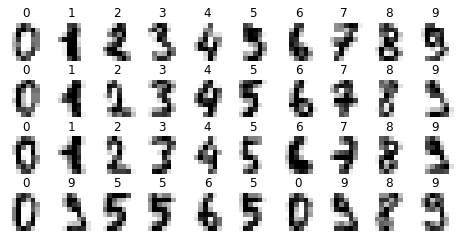

In [14]:
visual_multi(0) # ลำดับที่เริ่มแสดงภาพ

# Train and test

In [15]:
n_samples = len(digits.images)
n_samples

1797

In [16]:
X  = digits.images.reshape((n_samples,-1))
X[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=20)
X_train.shape,X_test.shape

((1078, 64), (719, 64))

In [21]:
from sklearn import svm

In [22]:
model = svm.SVC(gamma='scale')
model.fit(X_train,y_train)

SVC()

In [23]:
y_pred = model.predict(X_test)
y_pred[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [24]:
y_test[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
print('ACC score =  {:.4f}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

ACC score =  0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 63  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  1  0  1  2  0]
 [ 0  0  0  0 74  0  0  0  1  0]
 [ 0  0  0  0  0 70  0  0  0  1]
 [ 0  0  0  0  0  1 70 

In [27]:
import scikitplot as skplot

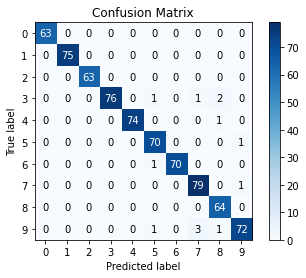

In [28]:
skplot.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

 # check wrong predict

In [29]:
idx_miss = np.where(y_test != y_pred)
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657],
       dtype=int64),)

In [30]:
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [31]:
y_pred[idx_miss]

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

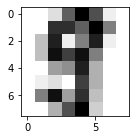

In [32]:
fig = plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_miss][0].reshape(8,8),cmap=plt.cm.gray_r)

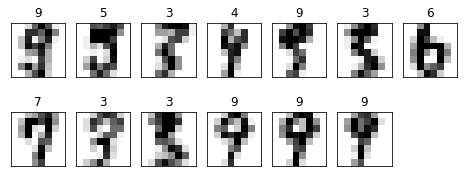

In [33]:
fig = plt.figure(figsize=(8,3)) # picture size W * H
for j,k in enumerate(idx_miss[0]):
    plt.subplot(2,7,j+1)
    plt.imshow(X_test[k].reshape(8,8), cmap=plt.cm.gray_r)
    plt.title(y_test[k])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Cross vilidation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
model = svm.SVC(gamma='scale')
cvs = cross_val_score(model,X,y,cv=10)
print(cvs.round(4))
cvs.mean().round(4)

[0.9444 0.9889 0.9278 0.9667 0.9833 0.9889 0.9889 0.9944 0.9609 0.9553]


0.97

# เปรียบเทียบ algorithm

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier()
cvs = cross_val_score(model,X,y,cv=10)
print(cvs.round(4))
cvs.mean().round(4)

[0.8056 0.85   0.8389 0.8056 0.7667 0.8778 0.8889 0.8156 0.8436 0.7877]


0.828

# เขียนตัวเลขด้วยมือและทำนาย
conda install -c anaconda pillow

In [38]:
from PIL import Image, ImageOps

In [39]:
model = svm.SVC(gamma='scale')
model.fit(X,y)

SVC()

C:\Users\user\AppData\Local\Temp\ipykernel_7908\2721295601.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS)


Predicted: 3


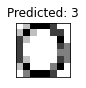

In [65]:
imgfile = 'digit0.jpg'
img = Image.open(imgfile).convert('L')     #อ่านข้อมูลภาพเป็นโทนเทา (ขาวดำ)
img = ImageOps.invert(img)                 #กลับ ขาว <--> ดำ (invert)

img = img.resize((8,8),Image.ANTIALIAS)
pixel = np.array(img)
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')

my_digit = pixel.reshape(1,-1)
predicted = model.predict(my_digit)

plt.figure(figsize=(1,1))
plt.imshow(pixel,cmap=plt.cm.gray_r)
plt.title('Predicted: {}'.format(predicted[0]))
print('Predicted: {}'.format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [80]:
def predict_digit(imgfile):
    img = Image.open(imgfile).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((8,8),Image.ANTIALIAS)
    
    pixel = np.array(img)
    pixel = pixel / 255.0 * 16
    pixel = pixel.astype('int')
    my_digit = pixel.reshape(1,-1)
    predicted = model.predict(my_digit)
    
    plt.figure(figsize=(1,1))
    plt.imshow(pixel,cmap=plt.cm.gray_r)
    plt.title('Predicted: {}'.format(predicted[0]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7908\1629172212.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS)


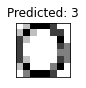

C:\Users\user\AppData\Local\Temp\ipykernel_7908\1629172212.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS)


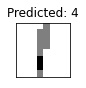

C:\Users\user\AppData\Local\Temp\ipykernel_7908\1629172212.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS)


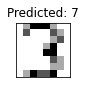

In [81]:
imgfiles = ['digit0.jpg','digit1.jpg','digit3.jpg']   
for i in imgfiles:
    predict_digit(i)

# create Dataset

In [101]:
imgfile = 'digit0_001.jpg'
img = Image.open(imgfile).convert('L')
img = ImageOps.invert(img)
img = img.resize((8,8), Image.ANTIALIAS)

pixel = np.array(img)
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel

C:\Users\user\AppData\Local\Temp\ipykernel_7908\4097761322.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((8,8), Image.ANTIALIAS)


array([[0, 0, 3, 3, 3, 0, 0, 0],
       [0, 4, 2, 1, 2, 4, 1, 0],
       [2, 3, 0, 0, 0, 0, 4, 1],
       [3, 1, 0, 0, 0, 0, 1, 4],
       [3, 2, 0, 0, 0, 0, 0, 4],
       [0, 5, 0, 0, 0, 0, 1, 3],
       [0, 1, 4, 2, 0, 2, 4, 1],
       [0, 0, 0, 3, 4, 3, 0, 0]])

In [93]:
digit1_001 = pixel.reshape(1,-1)[0]  # Feature number (1 * 64)
digit1_001

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
import pandas as pd

In [98]:
df = pd.DataFrame([digit0_001])
df = df.append([digit1_001])
df

C:\Users\user\AppData\Local\Temp\ipykernel_7908\1506456178.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([digit1_001])


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,3,3,3,0,0,0,0,4,...,4,1,0,0,0,3,4,3,0,0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
y=[0,1]
X=df

In [100]:
model.fit(X,y)

SVC()